# SYD DAT 6 

## Homework - Due Monday 28th November 2016

#### Course Project homework
Share with a me a Jupyter notebook containing the following:
* Data read into python in a data frame
* A statistical summary of your data
* A visualisation of your data
* One of the following with your data; Linear or Logistic Regression (with regularization), or Clustering.
* A written summary at the end describing your data

#### Bonus
Pick one data science topic that interests you, could be an article, or how a Kaggle competition was won, or an article incorporating data journalism. Write a short blog post (2 pages) with some visualisations where you discuss what was interesting.

**Instructions: share the notebook and any other docuements with your name on the file e.g. _alasdaird.ipynb.
Then commit this in your local repository, push it to your github account and create a pull request so I can see your work. Remeber if you get stuck to look at the slides going over Fork, Clone, Commit, Push and Pull request.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Hierarchy = pd.read_csv('HFM_PLU_Test.csv')
Def_cols = ['H1_num','H1_name', 'H1','H2_num','H2_name', 'H2','H3_num','H3_name', 'H3','H4_num','H4_name', 'H4','H5_num','H5_name', 'H5','SomeCode','SomeCode2']
Hierarchy = pd.read_csv('HFM_PLU_Hierarchy_clean.csv', header = None,names = Def_cols,index_col=False)

#Sales = pd.read_csv('HFM_Sales.csv')
Sales = pd.read_csv('HFM_Id_SaleHist.csv')
Hierarchy.head()

#Remove items where the field is null for Hierarchy 1 and 5
Hierarchy_clean = Hierarchy[Hierarchy.H1_num.isnull()==False]
Hierarchy_clean=Hierarchy_clean[Hierarchy.H5_num.isnull()==False]
Hierarchy_clean['ProductCode'] = Hierarchy_clean.H5_num


C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [2]:
#Drop duplicate in ProductCode
Hierarchy_clean2=Hierarchy_clean.drop_duplicates(subset='ProductCode')

In [3]:
#Merge Sales with the Hierarchy information
Sales_Hier = pd.merge(Sales,Hierarchy_clean2, on=['ProductCode'],how='left')
Sales_Hier.head()

,SequenceNumber,MasterNo,Time_ID,Hour_ID,SaleDate,Reference2,ProductCode,Quantity,ExtendedNetAmount,ExtendedTaxAmount,...,H3_name,H3,H4_num,H4_name,H4,H5_num,H5_name,H5,SomeCode,SomeCode2
0,69839344,3000008405,20151222,11,2015-12-22 10:42:16.000,20605049010,1161,0.382,1.52,0.0,...,Vegetables,01 - Vegetables,116.0,Broccoli,116 - Broccoli,1161.0,Broccoli - Kg,1161 - Broccoli - Kg,Broccoli,NaN
1,69839344,3000008405,20151222,11,2015-12-22 10:42:16.000,20605049010,2252,1.000,1.99,0.0,...,Vegetables,01 - Vegetables,225.0,Lettuce,225 - Lettuce,2252.0,Lettuce - Each,2252 - Lettuce - Each,Whole Iceburg Lettuce,NaN
2,69839344,3000008405,20151222,11,2015-12-22 10:42:16.000,20605049010,2441,0.127,0.51,0.0,...,Hard Vegetables,03 - Hard Vegetables,244.0,Onion Spanish,244 - Onion Spanish,2441.0,Onion Spanish - Kg,2441 - Onion Spanish - Kg,Spanish Onions,NaN
3,69839344,3000008405,20151222,11,2015-12-22 10:42:16.000,20605049010,1762,1.000,1.66,0.0,...,Vegetables,01 - Vegetables,176.0,Cucumber Telegraph,176 - Cucumber Telegraph,1762.0,Cucumber Telegraph - Each,1762 - Cucumber Telegraph - Each,Telegraph Cucumbers,NaN
4,69839344,3000008405,20151222,11,2015-12-22 10:42:16.000,20605049010,4991,0.487,2.43,0.0,...,Pears,02 - Pears,499.0,Pears Packham,499 - Pears Packham,4991.0,Pears Packham - Large - Kg,4991 - Pears Packham - Large - Kg,Packham Pear,NaN


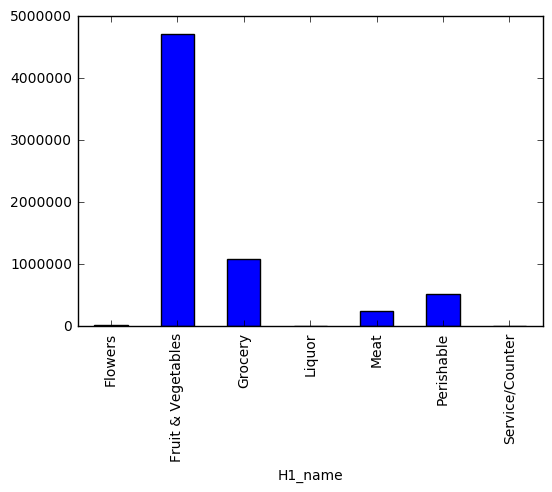

In [4]:
Sales_Hier.groupby(['H1_name']).Quantity.sum().plot(kind='bar')
plt.show()

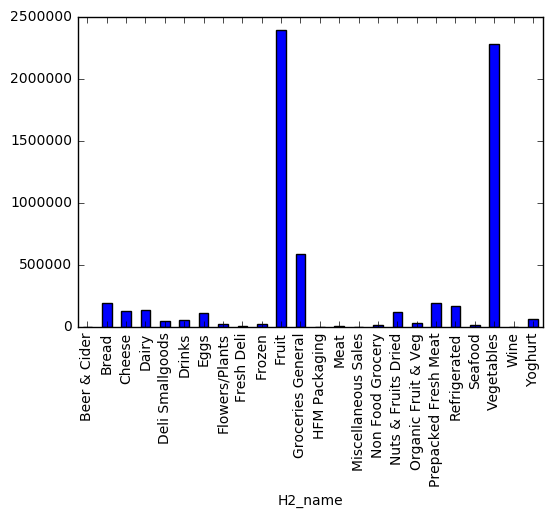

In [5]:
Sales_Hier.groupby(['H2_name']).Quantity.sum().plot(kind='bar')
plt.show()

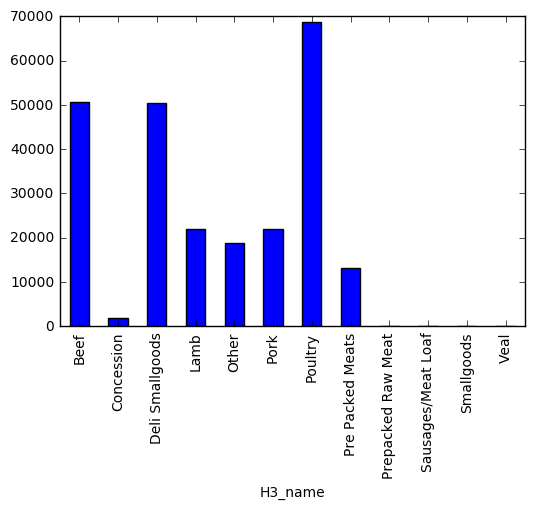

In [6]:
Sales_Hier[Sales_Hier.H1_name=='Meat'].groupby(['H3_name']).Quantity.sum().plot(kind='bar')
plt.show()

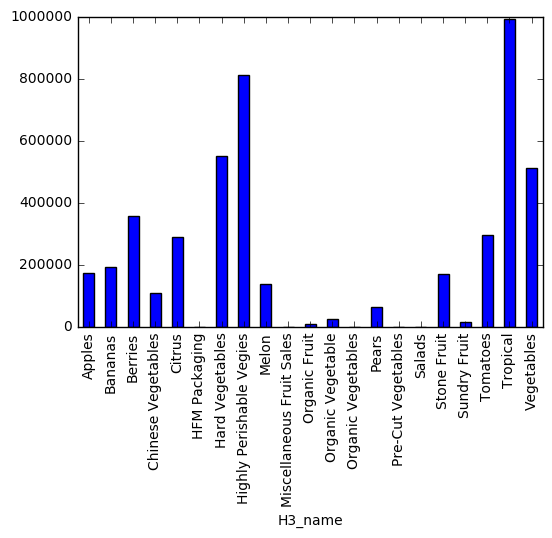

In [7]:
Sales_Hier[Sales_Hier.H1_name=='Fruit & Vegetables'].groupby(['H3_name']).Quantity.sum().plot(kind='bar')
plt.show()


In [8]:
#Format the date
Sales_Hier['date'] = pd.to_datetime(Sales_Hier['SaleDate'], format='%Y-%m-%d %H:%M:%S.%f')


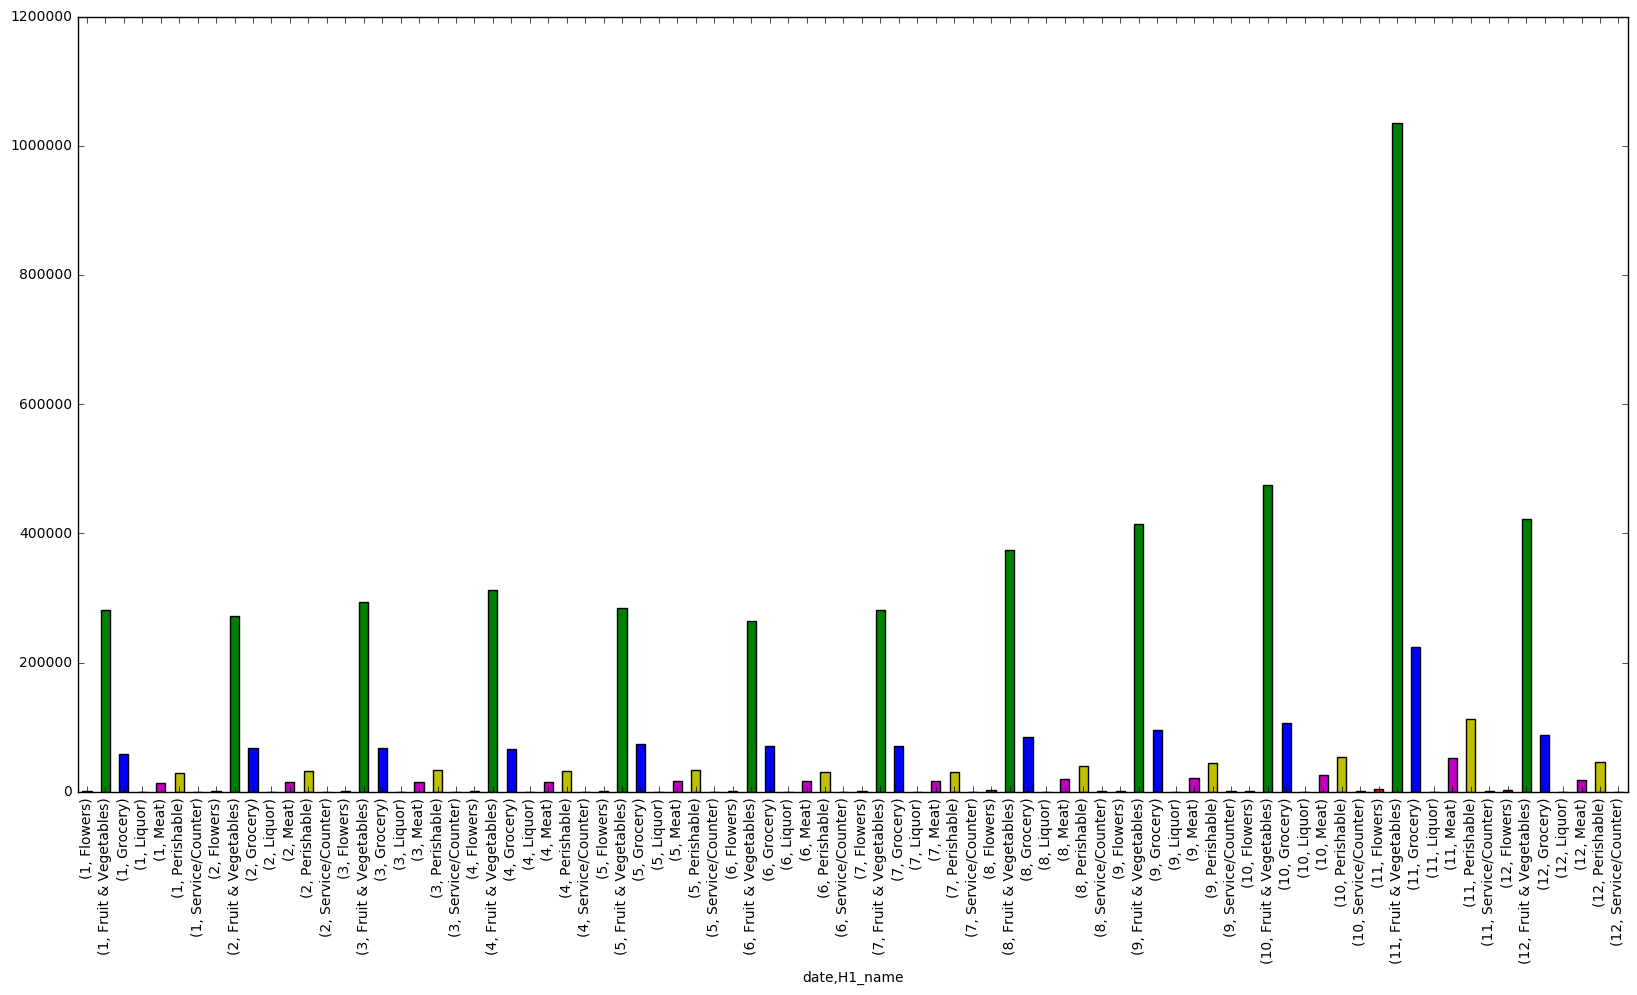

date  H1_name           
1     Flowers               9.230000e+02
      Fruit & Vegetables    2.811453e+05
      Grocery               5.835797e+04
      Liquor                8.000000e+00
      Meat                  1.382151e+04
      Perishable            2.977911e+04
      Service/Counter       2.814820e+02
2     Flowers               1.034500e+03
      Fruit & Vegetables    2.720558e+05
      Grocery               6.844853e+04
      Liquor                2.700000e+01
      Meat                  1.444945e+04
      Perishable            3.229614e+04
      Service/Counter       2.567500e+02
3     Flowers               1.194000e+03
      Fruit & Vegetables    2.938130e+05
      Grocery               6.796853e+04
      Liquor                2.000000e+01
      Meat                  1.461073e+04
      Perishable            3.327772e+04
      Service/Counter       2.828590e+02
4     Flowers               1.056000e+03
      Fruit & Vegetables    3.122061e+05
      Grocery               6.58

In [9]:
H1_columns = ['-','Fruit & Vegetables','Grocery','Perishable','Flowers','Meat','Liqor','Service/Counter']
Sales_Hier.groupby([Sales_Hier.date.dt.month,'H1_name']).Quantity.sum().plot(kind='bar',figsize=(20,10),color = ['r', 'g', 'b', 'c', 'm', 'y', 'b'])
plt.show()
Sales_Hier.groupby([Sales_Hier.date.dt.month,'H1_name']).Quantity.sum()

In [10]:
Customer_basket= pd.pivot_table(Sales_Hier,index='Reference2', columns='H1_name', values='Quantity',aggfunc='sum')
#Sales_Hier.head()

In [11]:
Customer_basket[Customer_basket.Meat.isnull()== False]

H1_name,Flowers,Fruit & Vegetables,Grocery,Liquor,Meat,Perishable,Service/Counter
Reference2,,,,,,,
21002928667,NaN,14.110,NaN,NaN,1.000,0.700,NaN
21002928724,NaN,5.691,4.000,NaN,2.000,3.406,NaN
21002928812,NaN,15.130,6.000,NaN,1.000,2.000,NaN
21002928824,NaN,4.149,4.000,NaN,1.000,1.000,NaN
21002928960,NaN,9.488,6.000,NaN,0.256,2.932,NaN
21002928999,NaN,42.224,4.162,NaN,1.000,3.000,NaN
21002929392,NaN,36.364,1.000,NaN,1.000,4.000,NaN
21002929453,NaN,10.633,4.000,NaN,1.000,0.666,NaN
21002929599,NaN,3.555,2.000,NaN,1.000,2.000,NaN


In [12]:
Customer_basket_1 =Customer_basket[['Flowers','Fruit & Vegetables','Grocery','Liquor','Meat','Perishable','Service/Counter']]